In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('titanic.csv')

In [7]:
data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

gender_mapper = {'male': 0, 'female': 1}
data['Sex'].replace(gender_mapper, inplace=True)
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']]
data = data.rename(columns={'Title': 'Title_Unusual'})
data.drop('Name', axis=1, inplace=True)

data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']]
data.drop('Cabin', axis=1, inplace=True)

emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked')
data = pd.concat([data, emb_dummies], axis=1)
data.drop('Embarked', axis=1, inplace=True)

In [22]:
mean_ages = data['Age'].fillna(data['Age'].mean())

In [10]:
from impyute.imputation.cs import mice
imputed = mice(X.values)
mice_ages = imputed[:, 2]

Text(0.5, 1.0, 'MEAN IMPUTATION')

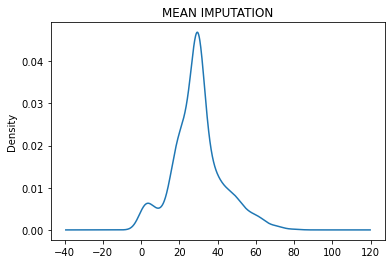

In [32]:
pd.DataFrame(mean_ages).plot(kind='density',ylabel='Density', legend=None)
plt.title('MEAN IMPUTATION')

Text(0.5, 1.0, 'MICE IMPUTATION')

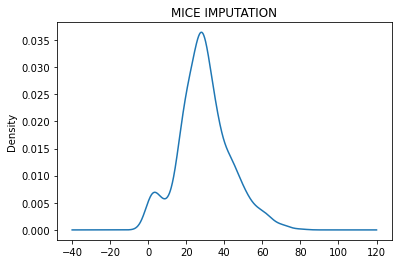

In [31]:
pd.DataFrame(mice_ages).plot(kind='density',legend=None )
plt.title('MICE IMPUTATION')